
<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">


* [santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)
* <font color="red">⚠️주의사항⚠️ : 다양한 라이브러리의 추상화된 고수준 인터페이스를 제공하기 있기 때문에 환경에 따라 라이브러리 버전간의 충돌이나 오류가 발생할 수 있습니다.</font> 


## 데이터셋 출처

* [서울시 공공자전거 이용정보(월별)> 데이터셋> 공공데이터 | 서울열린데이터광장](http://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do)


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot, plotly.express 을 로드합니다. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# !pip install cufflinks
import cufflinks as cf
# 그래프가 주피터 노트북에서 표시되지 않는다면 아래 설정을 사용해 주세요.
cf.go_offline(connected = True)

## 시각화를 위한 한글폰트 설정

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:title={'center':'한글'}>

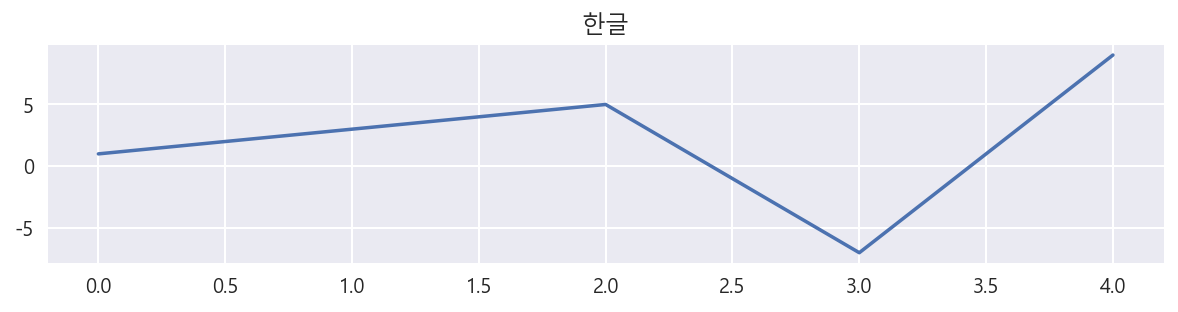

In [4]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글", figsize=(10, 2))

## 데이터셋 불러오기

In [5]:
# ./data/seoul-bike-2021/*.csv
# glob 로 목록 출력하기
import glob

paths = glob.glob("data/seoul-bike-2021/*.csv")
paths

['data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.01.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.02.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.03.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.04.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.05.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.06.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.07.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.08.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.09.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.10.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.11.csv',
 'data/seoul-bike-2021\\서울특별시 공공자전거 이용정보(월별)_21.12.csv']

In [6]:
# columns={"이동거리(M)": "이용거리(M)", "이용시간(본)":"이용시간(분)"} 컬럼명 일관되게 변경하기
# temp 에 데이터 프레임 담기
# temp = []
columns={"이동거리(M)": "이용거리(M)", "이용시간(본)":"이용시간(분)"} 
temp = [pd.read_csv(pth, encoding="cp949").rename(columns=columns) for pth in paths]
len(temp)

12

## concat으로 전체 파일 하나로 병합하기

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [7]:
# concat 으로 하나의 데이터프레임으로 변환하기
raw = pd.concat(temp)
raw

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134
...,...,...,...,...,...,...,...,...,...,...,...
102921,2021-12,9999,상담센터,정기,M,AGE_005,2,77.06,0.64,2780.00,31
102922,2021-12,9999,상담센터,정기,M,AGE_006,1,6.38,0.05,230.10,2
102923,2021-12,9999,상담센터,정기,M,AGE_008,2,82.11,0.74,3190.00,28
102924,2021-12,88888,88888.영남배송,정기,M,AGE_006,1,0.00,0.00,0.00,17


## info 보기

In [8]:
# info
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323515 entries, 0 to 102925
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1323515 non-null  object 
 1   대여소번호    1323515 non-null  int64  
 2   대여소명     1323515 non-null  object 
 3   대여구분코드   1323515 non-null  object 
 4   성별       1151062 non-null  object 
 5   연령대코드    1323515 non-null  object 
 6   이용건수     1323515 non-null  int64  
 7   운동량      1323515 non-null  object 
 8   탄소량      1323515 non-null  object 
 9   이용거리(M)  1323515 non-null  float64
 10  이용시간(분)  1323515 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 121.2+ MB


In [9]:
# dtypes
raw.dtypes

대여일자        object
대여소번호        int64
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량         object
탄소량         object
이용거리(M)    float64
이용시간(분)      int64
dtype: object

## 데이터 타입 변경

In [10]:
# 운동량, 탄소량 to_numeric 으로 변경하기
raw["운동량"] = pd.to_numeric(raw["운동량"], errors="coerce")
raw["탄소량"] = pd.to_numeric(raw["탄소량"], errors="coerce")

## 결측치

In [11]:
# 결측치 합계
raw.isnull().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         172453
연령대코드           0
이용건수            0
운동량          1899
탄소량          1899
이용거리(M)         0
이용시간(분)         0
dtype: int64

<AxesSubplot:>

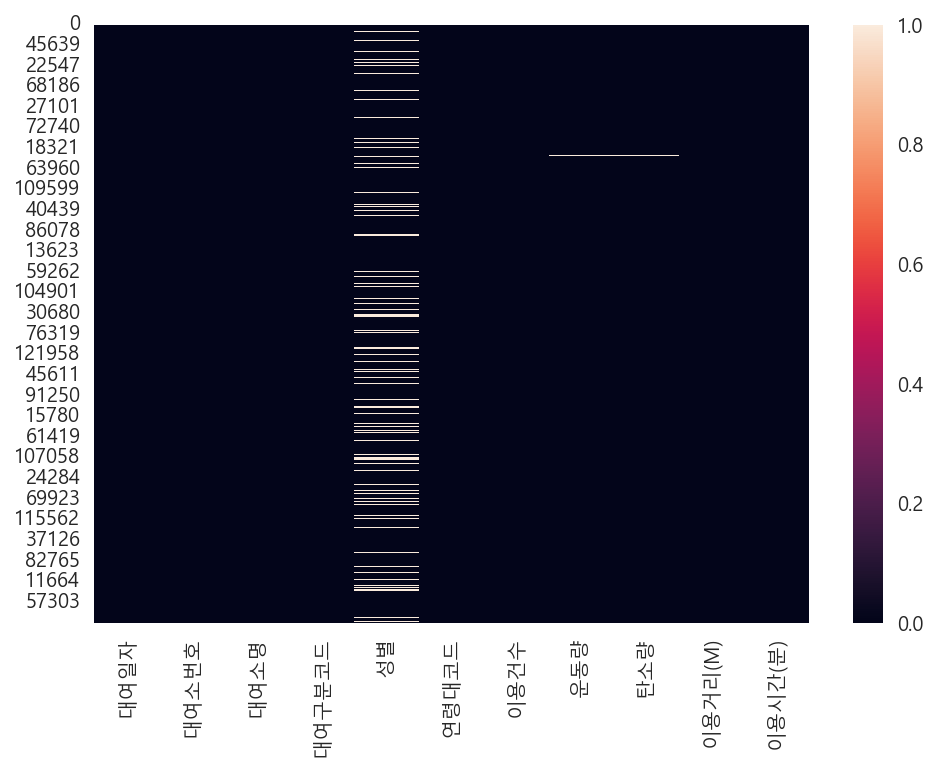

In [12]:
# 결측치 시각화
sns.heatmap(raw.isnull())

## 대여소 정보 불러오기

In [13]:


# 대여소 정보 불러오기
# data/bike_station.csv
# "대여소번호", "자치구", "위도", "경도", "운영방식" 컬럼만 가져오기
df_st = pd.read_csv("data/bike_station.csv")[["대여소번호", "자치구", "위도", "경도", "운영방식"]]
df_st.shape

(2586, 5)

In [14]:
df_st.head(2)

,대여소번호,자치구,위도,경도,운영방식
0,102.0,마포구,37.555649,126.910629,LCD
1,103.0,마포구,37.554951,126.910835,LCD


In [15]:
# 대여소번호 는 int 형식으로 변경하기
df_st["대여소번호"] = df_st["대여소번호"].astype(int)

## 대여정보와 대여소정보 merge로 합치기

<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



In [16]:
raw.shape

(1323515, 11)

In [17]:
df_st

,대여소번호,자치구,위도,경도,운영방식
0,102,마포구,37.555649,126.910629,LCD
1,103,마포구,37.554951,126.910835,LCD
2,104,마포구,37.550629,126.914986,LCD
3,105,마포구,37.550007,126.914825,LCD
4,106,마포구,37.548645,126.912827,LCD
...,...,...,...,...,...
2581,5070,강서구,37.556763,126.818695,QR
2582,5072,강서구,37.561546,126.807083,QR
2583,5073,강서구,37.546619,126.836235,QR
2584,5074,강서구,37.558235,126.825760,QR


In [18]:
# merge 로 대여정보와 대여소 정보 병합하기
df = raw.merge(df_st, on="대여소번호", how="left")
df.shape, raw.shape, df_st.shape

((1323515, 15), (1323515, 11), (2586, 5))

In [19]:
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25,NaN,NaN,NaN,NaN
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166,NaN,NaN,NaN,NaN
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13,NaN,NaN,NaN,NaN
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47,NaN,NaN,NaN,NaN
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323515 entries, 0 to 1323514
Data columns (total 15 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1323515 non-null  object 
 1   대여소번호    1323515 non-null  int64  
 2   대여소명     1323515 non-null  object 
 3   대여구분코드   1323515 non-null  object 
 4   성별       1151062 non-null  object 
 5   연령대코드    1323515 non-null  object 
 6   이용건수     1323515 non-null  int64  
 7   운동량      1321616 non-null  float64
 8   탄소량      1321616 non-null  float64
 9   이용거리(M)  1323515 non-null  float64
 10  이용시간(분)  1323515 non-null  int64  
 11  자치구      1309285 non-null  object 
 12  위도       1309285 non-null  float64
 13  경도       1309285 non-null  float64
 14  운영방식     1309285 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 161.6+ MB


## downcast 하기

In [21]:
# pd.to_numeric()

In [24]:
df.select_dtypes("integer").columns

Index(['대여소번호', '이용건수', '이용시간(분)'], dtype='object')

In [25]:
fcols = df.select_dtypes("float").columns
icols = df.select_dtypes("int").columns
bcols = df.select_dtypes("bool").columns
ocols = df.select_dtypes("object").columns


df[fcols] = df[fcols].apply(pd.to_numeric, downcast="float")
df[icols] = df[icols].apply(pd.to_numeric, downcast="integer")
df[bcols] = df[bcols].apply(pd.to_numeric, downcast="int8")
df[ocols] = df[ocols].astype("category")

## downcast 후 파일 용량과 메모리 크기 확인하기

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323515 entries, 0 to 1323514
Data columns (total 15 columns):
 #   Column   Non-Null Count    Dtype   
---  ------   --------------    -----   
 0   대여일자     1323515 non-null  category
 1   대여소번호    1323515 non-null  int32   
 2   대여소명     1323515 non-null  category
 3   대여구분코드   1323515 non-null  category
 4   성별       1151062 non-null  category
 5   연령대코드    1323515 non-null  category
 6   이용건수     1323515 non-null  int16   
 7   운동량      1321616 non-null  float32 
 8   탄소량      1321616 non-null  float32 
 9   이용거리(M)  1323515 non-null  float32 
 10  이용시간(분)  1323515 non-null  int32   
 11  자치구      1309285 non-null  category
 12  위도       1309285 non-null  float32 
 13  경도       1309285 non-null  float32 
 14  운영방식     1309285 non-null  category
dtypes: category(7), float32(5), int16(1), int32(2)
memory usage: 58.1 MB


In [27]:
# 결측치 비율
df.isnull().mean() * 100

대여일자        0.000000
대여소번호       0.000000
대여소명        0.000000
대여구분코드      0.000000
성별         13.029924
연령대코드       0.000000
이용건수        0.000000
운동량         0.143482
탄소량         0.143482
이용거리(M)     0.000000
이용시간(분)     0.000000
자치구         1.075167
위도          1.075167
경도          1.075167
운영방식        1.075167
dtype: float64

<AxesSubplot:>

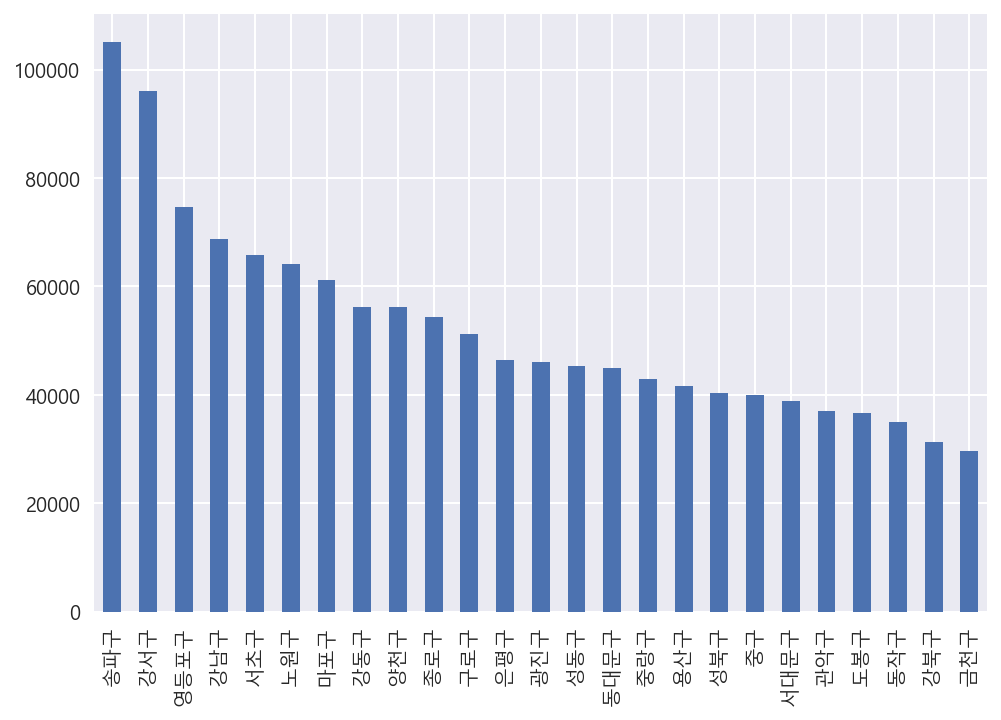

In [28]:
# 자치구 별 빈도수 구하기
df["자치구"].value_counts().plot(kind="bar")

In [29]:
df["자치구"].value_counts().iplot(kind="bar")

## 히스토그램

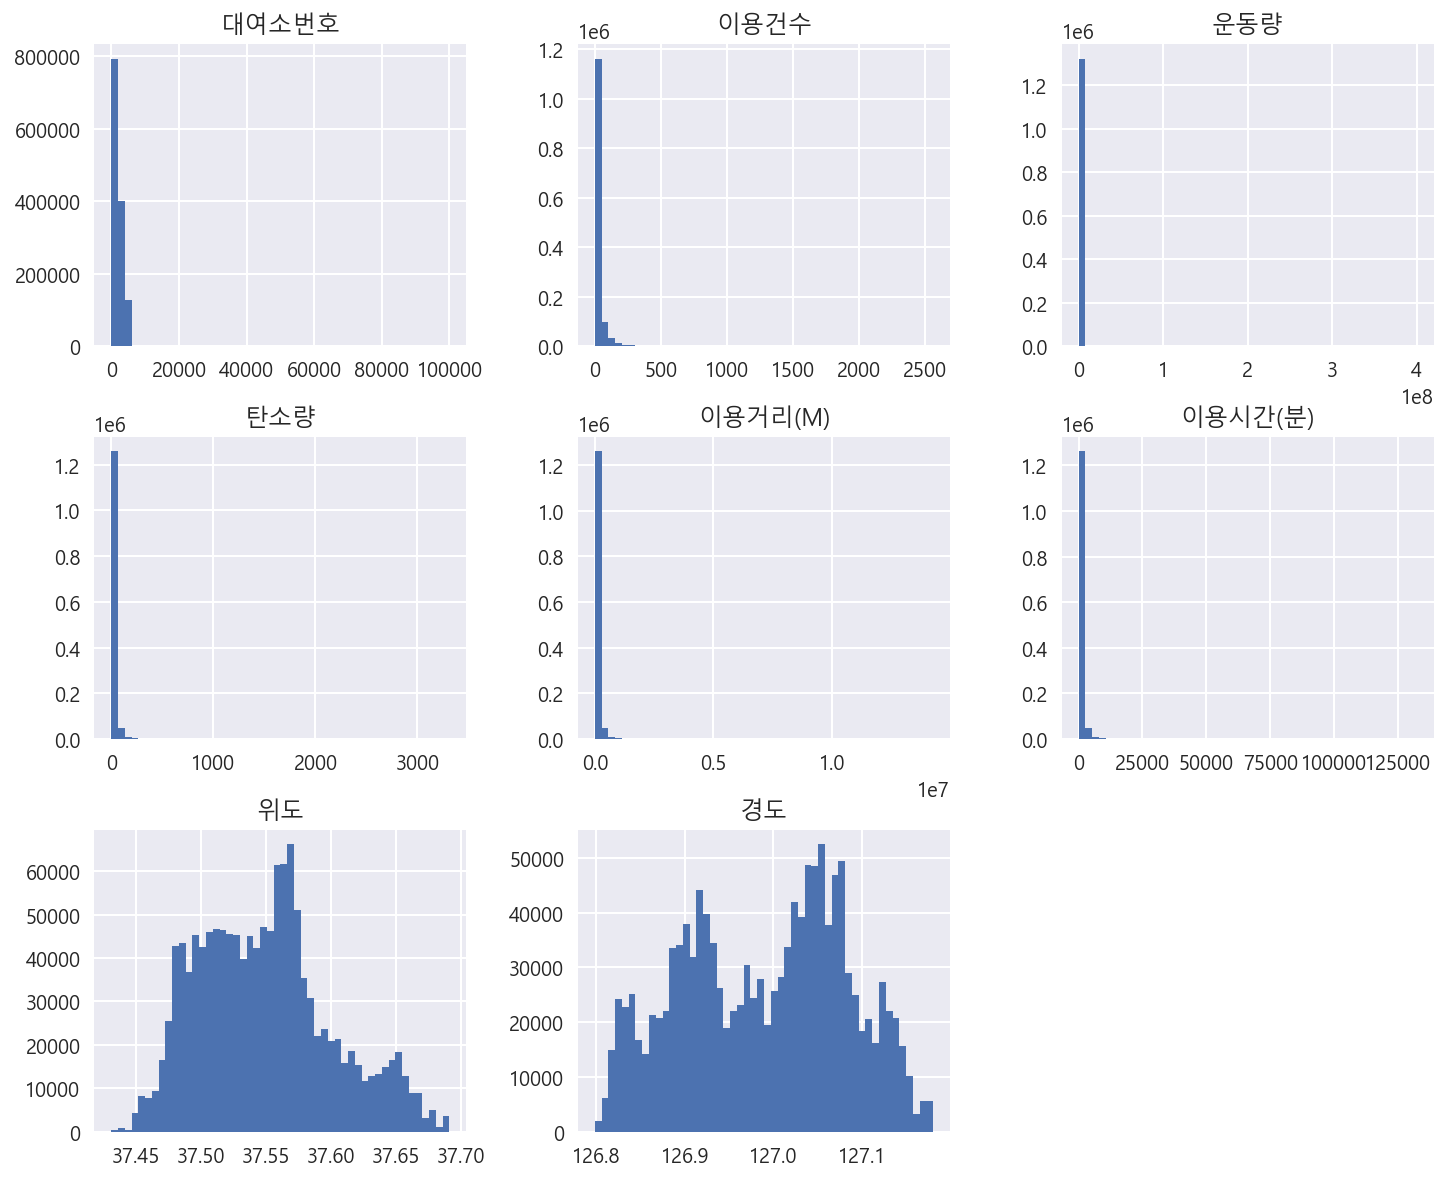

In [30]:
_ = df.hist(figsize=(12, 10), bins=50)

## 이용건수

In [31]:
# 이용건수가 1000 이상인 데이터 찾기
df[df["이용건수"] > 2000]

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구,위도,경도,운영방식
260387,2021-04,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2301,350736.18750,3314.159912,14285335.0,130483,영등포구,37.527157,126.931900,LCD
273315,2021-04,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2306,309633.15625,2923.449951,12601358.0,114994,광진구,37.531860,127.067192,LCD
856552,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),\N,AGE_002,2379,316001.59375,3002.360107,12940352.0,129664,영등포구,37.527157,126.931900,LCD
856566,2021-09,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_002,2236,268468.37500,2702.659912,11649881.0,132301,영등포구,37.527157,126.931900,LCD
870019,2021-09,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),\N,AGE_002,2559,315695.65625,2960.399902,12760541.0,122013,광진구,37.531860,127.067192,LCD


## 대여구분
RCC_001(정기권), RCC_002(일일권), RCC_003(일일권:비회원), RCC_004(단체권)

In [ ]:
# 대여구분코드 빈도수 구하기
df["대여구분코드"].value_counts()

In [ ]:
df["대여구분코드"] = df["대여구분코드"].str.replace("BIL_021", "10분이용권")

In [ ]:
# countplot으로 "대여구분코드" 빈도수 시각화
sns.countplot(data=df, x="대여구분코드")

In [ ]:
import plotly

plotly.__version__

In [ ]:
# x="이용건수", y="대여구분코드" 합계 구하기
px.histogram(df, x="대여구분코드",  y="이용건수", histfunc="sum")

In [ ]:
sns.barplot(data=df, x="이용건수", y="대여구분코드", estimator=np.sum, ci=None, orient="h")

## 성별
\N, 공백은 성별을 선택하지 않은 경우이며,

성별이 F,M 외에 \N(null값), 공백이 포함되어있는 이유는

19년10월까지는 회원가입 시 성별 기입이 선택사항이었기 때문

In [ ]:
# 성별 빈도수 구하기
df["성별"].value_counts()

In [ ]:
# 성별 대문자로 변경
df["성별"] = df["성별"].str.upper()

In [ ]:
# value_counts 로 전처리 값 확인
df["성별"].value_counts().iplot(kind="bar", title="성별 데이터 건수")

In [ ]:
px.histogram(df, x="성별", y="이용건수", histfunc="sum")

In [ ]:
gender_sum = df.groupby("성별")["이용건수"].sum()

px.bar(gender_sum, text=gender_sum)

## 연령대

```
10대 : AGE_001
20대 : AGE_002
30대 : AGE_003
40대 : AGE_004
50대 : AGE_005
60대 : AGE_006
70대 : AGE_007
기타 : AGE_008 ( 비회원, 외국인, 그 이상 등 )
```

In [ ]:
age_code = """
10대 : AGE_001
20대 : AGE_002
30대 : AGE_003
40대 : AGE_004
50대 : AGE_005
60대 : AGE_006
70대 : AGE_007
기타 : AGE_008
( 비회원, 외국인, 그 이상 등 )"""
age_code

In [ ]:
age_code.split("\n")

In [ ]:
# age_dict 값 만들기
age_dict = {}
for age in age_code.split("\n")[1:-1]:
    key = age.split(":")[1].strip()
    val = age.split(":")[0].strip()
    age_dict[key] = val
age_dict

In [ ]:
age_dict = { age.split(":")[1].strip() : age.split(":")[0].strip() for age in age_code.split("\n")[1:-1]}
age_dict

### map 활용하기

In [ ]:
df.head(1)

In [ ]:
# "연령대" 파생변수 만들기
df["연령대"] = df["연령대코드"].map(age_dict)
df.head(1)

In [ ]:
# 연령대 빈도수 구하기
age_count = df["연령대"].value_counts().sort_index()
age_count

In [ ]:
# 연령대 빈도수 시각화
age_count.iplot(kind="bar")

## 연령대 vs 성별

In [ ]:
# index="연령대", columns="성별", values="이용건수" 합계
age_gender = pd.pivot_table(data=df, index="연령대", columns="성별", values="이용건수", aggfunc=np.sum)
age_gender.plot(kind="bar", figsize=(10, 3), rot=0)

In [ ]:
# 연령대, 성별, 이용건수 시각화
age_gender.iplot(kind="bar")

In [ ]:
sns.barplot(data=df, x="연령대", y="이용건수", estimator=np.sum, hue="성별", ci=None)

## 자치구 vs 연령대

In [ ]:
# index="자치구", columns="연령대", values="이용건수" 합계
gu_age = pd.pivot_table(data=df, index="자치구", columns="연령대", values="이용건수", aggfunc=np.sum)
gu_age.round(0).astype(int).style.background_gradient(cmap="Greens")

In [ ]:
print(plt.colormaps())

In [ ]:
# heatmap 으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(gu_age, annot=True, fmt=",.0f", cmap="Greens")

## 정렬하기

In [ ]:
#"대여일자", "대여소번호", "성별", "연령대코드" 로 정렬하기
df = df.sort_values(by=["대여일자", "대여소번호", "성별", "연령대코드"])
df.head(2)

## 전처리 내용 저장하기

In [ ]:
# to_csv 로 저장하기
# to_parquet로 저장하기
df.to_csv("data/monthly_bike_2021.csv", index=False)

df.to_parquet("data/monthly_bike_2021.parquet.gzip", compression="gzip", index=False)

In [ ]:
pd.read_csv("data/monthly_bike_2021.csv")

In [ ]:
# 저장한 내용 확인하기
pd.read_parquet("data/monthly_bike_2021.parquet.gzip")